In [1]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

In [4]:
print("Trader Data Columns:\n",trader_df.columns)
print("\n Sentiment Data Preview:")
display(sentiment_df.head())

print("\n Trader Data Preview")
display(trader_df.head())

Trader Data Columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

 Sentiment Data Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



 Trader Data Preview


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors = 'coerce').dt.date
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], errors = 'coerce').dt.date

In [6]:
trader_agg = trader_df.groupby('date').agg({
    'Execution Price': 'mean',
    'Size Tokens': 'sum',
    'Size USD': 'sum',
    'Closed PnL': 'sum',
    'Fee': 'sum'
}).reset_index()

In [7]:
merged_df = pd.concat([
    trader_agg.set_index('date'),
    sentiment_df.set_index('date')],
    axis=1, join = 'inner').reset_index()

display(merged_df.head())

,date,Execution Price,Size Tokens,Size USD,Closed PnL,Fee,timestamp,value,classification
0,2023-01-05,1898.133333,2.513000e-01,477.00,0.000000,0.000000,1672896600,29,Fear
1,2023-05-12,11038.300000,1.180901e+01,50005.83,0.000000,12.501455,1683869400,49,Neutral
2,2024-01-01,10373.330667,4.178787e+03,264239.53,-129.531460,66.059867,1704087000,65,Greed
3,2024-01-02,0.076126,4.498600e+04,2008.18,0.000000,0.502044,1704173400,71,Greed
4,2024-01-03,2.725657,2.598468e+07,472974.70,8244.241409,-0.546854,1704259800,70,Greed


In [8]:
trade_counts = merged_df.groupby('classification').size()
print("Trade counts by sentiment:\n", trade_counts)

Trade counts by sentiment:
 classification
Extreme Fear      6
Extreme Greed    43
Fear             37
Greed            56
Neutral          16
dtype: int64


In [9]:
avg_trade_size = merged_df.groupby('classification')['Size USD'].mean()
print("\nAverage Trade Size by Sentiment:\n", avg_trade_size)


Average Trade Size by Sentiment:
 classification
Extreme Fear     1.596707e+06
Extreme Greed    4.238084e+05
Fear             2.153362e+06
Greed            1.018675e+06
Neutral          7.462220e+05
Name: Size USD, dtype: float64


In [10]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
print("\nAverage PnL by Sentiment:\n", avg_pnl)


Average PnL by Sentiment:
 classification
Extreme Fear       733.322758
Extreme Greed    26904.504083
Fear             48087.177910
Greed            10886.295226
Neutral           4666.046374
Name: Closed PnL, dtype: float64


In [11]:
os.makedirs("outputs", exist_ok= True)

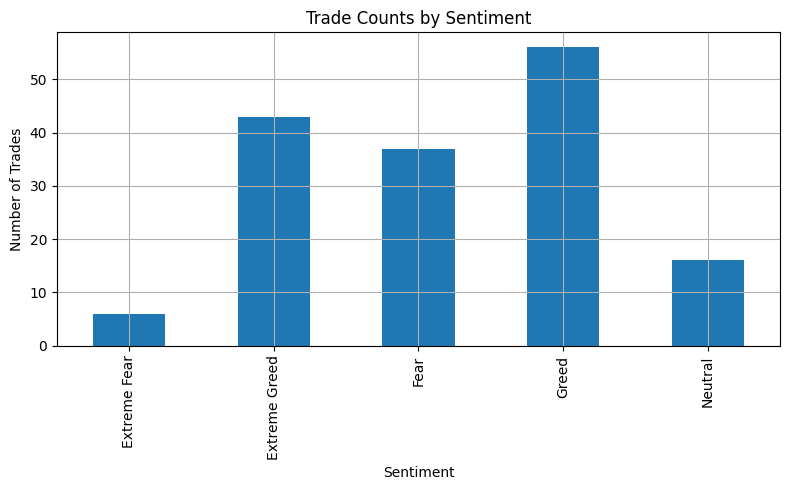

In [12]:
trade_counts.plot(kind = 'bar', title = 'Trade Counts by Sentiment', figsize = (8,5))
plt.ylabel("Number of Trades")
plt.xlabel("Sentiment")
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/trade_counts_by_sentiment.png")
plt.show()

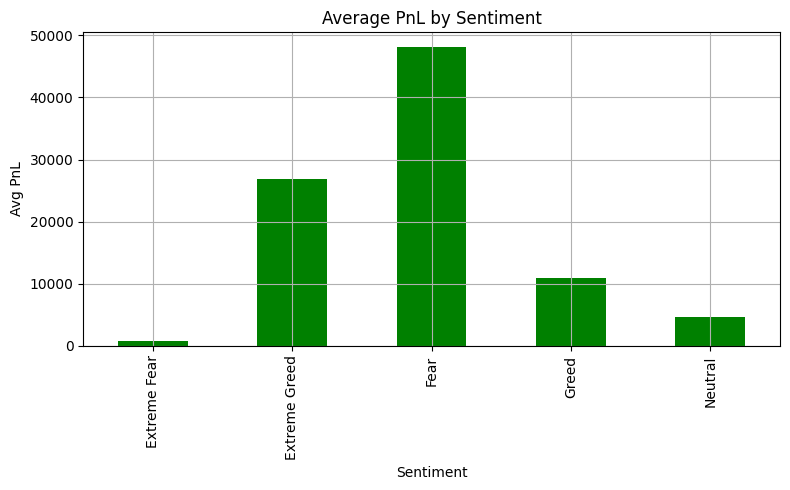

In [13]:
avg_pnl.plot(kind = 'bar', title = 'Average PnL by Sentiment', figsize = (8,5), color = 'green')
plt.ylabel("Avg PnL")
plt.xlabel("Sentiment")
plt.grid(True)
plt.tight_layout()
plt.savefig("outputs/avg_pnl_by_sentiment.png")
plt.show()

In [14]:
os.makedirs("csv_files", exist_ok= True)

In [15]:
merged_df.to_csv("csv_files/merged_trader_sentiment.csv", index=False)
trader_agg.to_csv("csv_files/aggregated_trader_data.csv", index=False)


In [ ]:
from google.colab import files

files.download("csv_files/merged_trader_sentiment.csv")
files.download("csv_files/aggregated_trader_data.csv")
